# Di chuyển đến đúng thư mục và import

In [6]:
# run this in
%cd /mnt/Data/Projects/ThyroidCancerClassifier

/mnt/Data/Projects/ThyroidCancerClassifier


/home/harito/venv/pyvenv311/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
# from src.model.classifier.H1 import H1
# from src.model.classifier.H2 import H2
# from src.model.classifier.H3 import H3
# from src.model.classifier.H4 import H4
# from src.model.classifier.H5 import H5
# from src.model.classifier.H6 import H6
from src.model.classifier.H7 import H7

# Đọc vào ảnh test

In [8]:
import cv2
import numpy as np
import torch

def read_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image
    image = cv2.resize(image, (224, 224))
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Normalize the image
    image = image.astype('float32') / 255.0
    # Add a batch dimension
    image = np.expand_dims(image, axis=0)
    # Convert to tensor
    image_tensor = torch.from_numpy(image)
    # Permute the dimensions to match (N, C, H, W)
    image_tensor = image_tensor.permute(0, 3, 1, 2).float()
    return image_tensor

image_path = '/mnt/Data/Projects/ThyroidCancer/Phase1/Data/origin_data/B256/B5/z4840977724136_ca09a77de864f8f8c41d595b1be0cb58.jpg'
image = read_image(image_path)

In [4]:
image.shape

torch.Size([1, 3, 224, 224])

# Load model để test

In [4]:
# Load model
h1 = H1()
h2 = H2()
h3 = H3()

/home/harito/venv/pyvenv311/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/harito/venv/pyvenv311/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Xem bản đồ đặc trưng sau khi trích rút đặc trưng của các model

## H1

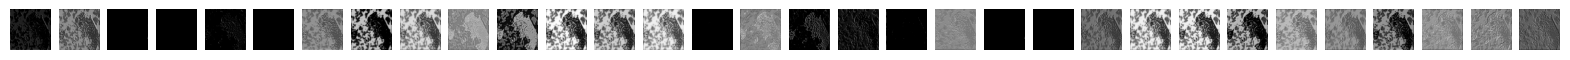

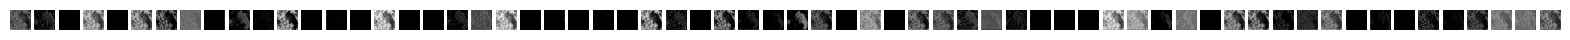

In [5]:
# Đọc bản đồ đặc trưng của ảnh sau khi qua model
h1.visualize_feature_maps(image)

## H2

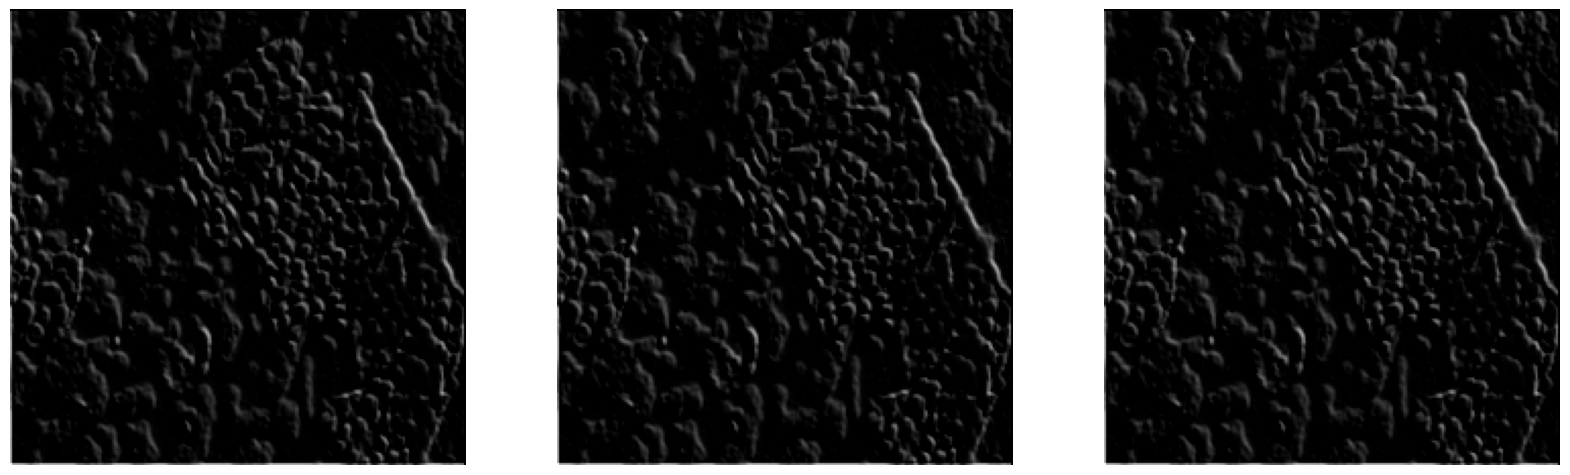

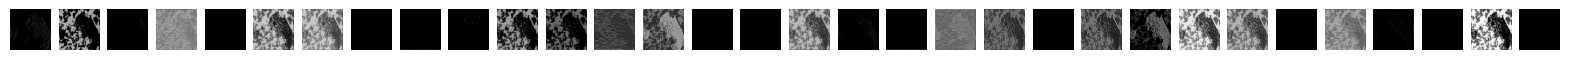

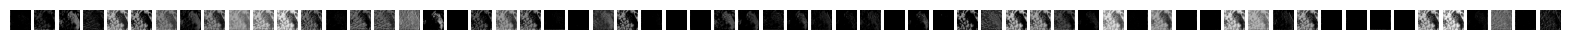

In [6]:
h2.visualize_feature_maps(image)

## H3

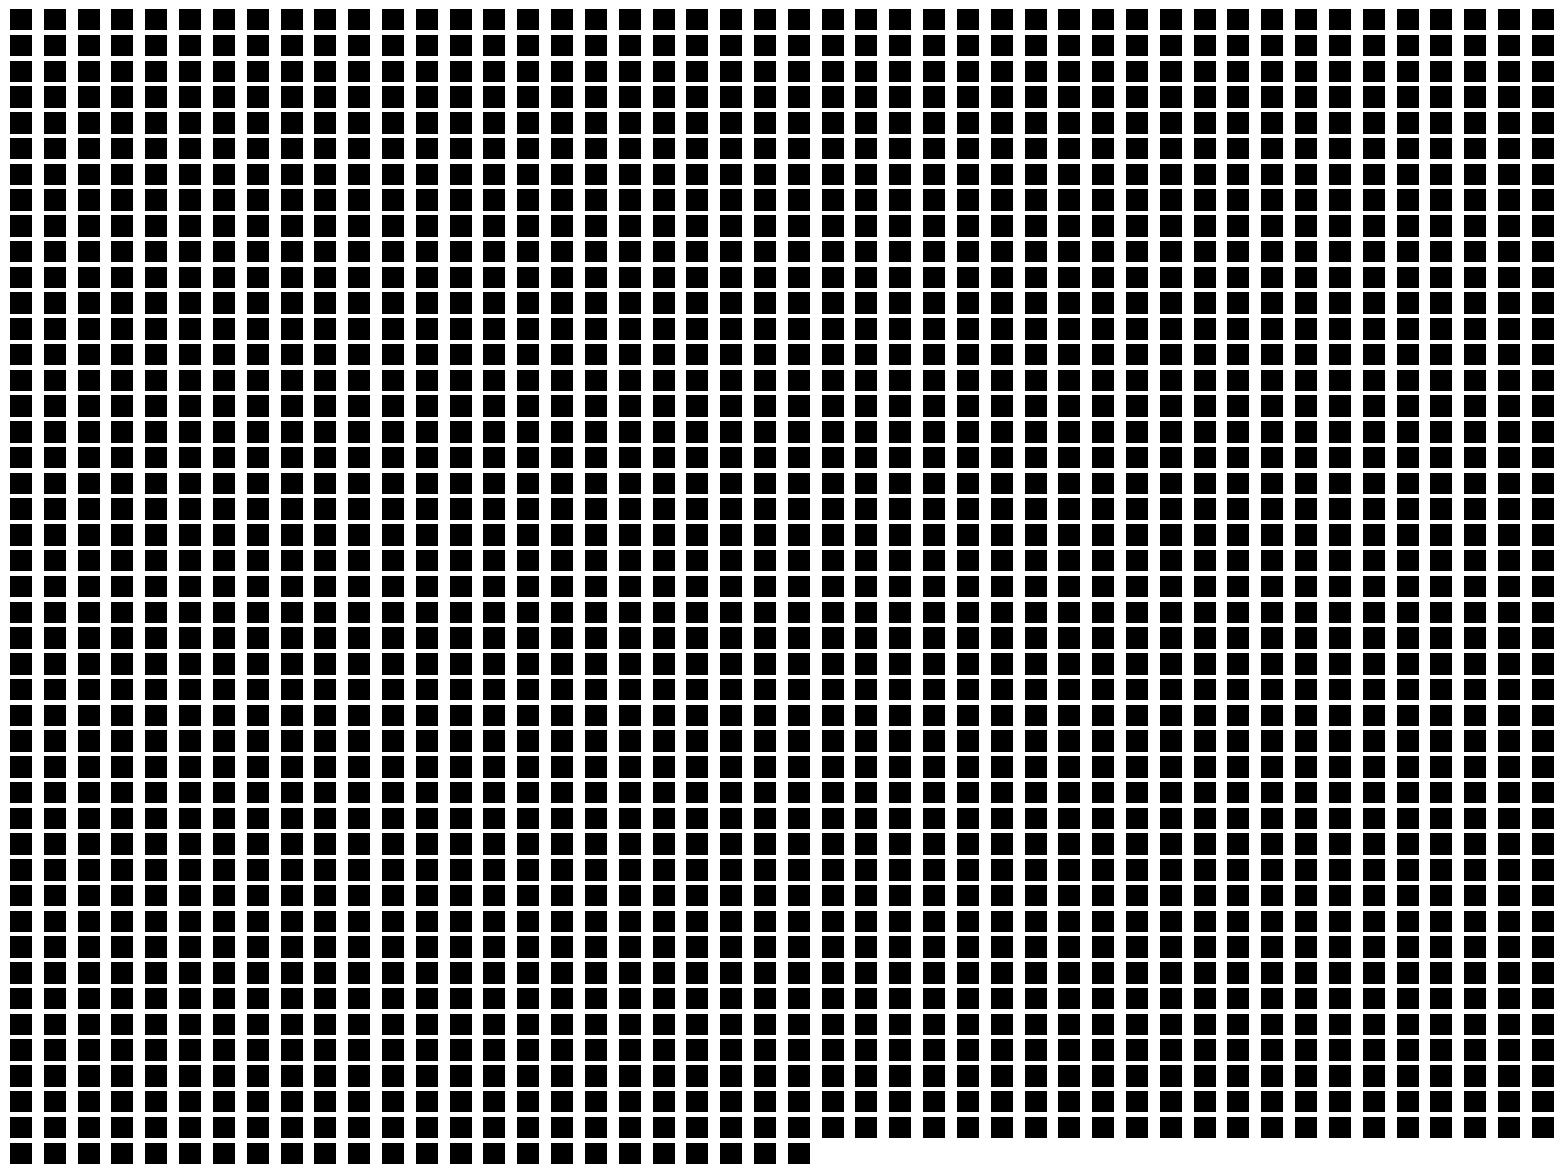

In [7]:
h3.visualize_feature_maps(image, show_last_layer=True)

## Fix bug để viết hàm đúng

In [8]:
ex2 = h2.get_feature_maps(image)
print(len(ex2))

4


In [9]:
print(len(ex2[0]), len(ex2[1]), len(ex2[2]), len(ex2[3]))

1 1 1 1


In [10]:
print(ex2[0].shape)

torch.Size([1, 3, 224, 224])


In [11]:
ex3 = h3.get_feature_maps(image)
print(len(ex3))

1


In [12]:
print(len(ex3[0]))

1


In [13]:
print(ex3[0].shape)

torch.Size([1, 2048, 1, 1])


In [14]:
print(ex3[0])

tensor([[[[0.0000e+00]],

         [[1.3005e-01]],

         [[1.9537e-04]],

         ...,

         [[1.3707e-01]],

         [[1.4094e-01]],

         [[5.4695e-01]]]])


## H4

In [ ]:
h4 = H4()
ex4 = h4(image)

## H5

In [4]:
h5 = H5()
ex5 = h5(image)

/home/harito/venv/pyvenv311/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/harito/venv/pyvenv311/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## H6

In [5]:
h6 = H6()
ex6 = h6(image)

/home/harito/venv/pyvenv311/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/harito/venv/pyvenv311/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## H7

In [9]:
h7 = H7()
ex7 = h7(image)

In [ ]:
9 2     | 0.6 0.13
4 130   | 0.26 0.87

In [2]:
2/(9+2+4)

0.13333333333333333